In [551]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
plt.rcParams["figure.figsize"] = (6.4*2,4.8*1.5)
from dsp import util
import json

Fs = 150e6/8/256

In [552]:
def process_scan(file, base='session'):
    path = f'session/{file}.json'
    with open(path, "r") as fp:
        data = json.load(fp)

    return data["1"], data["7"]

Text(0.5, 1.0, 'Time Window')

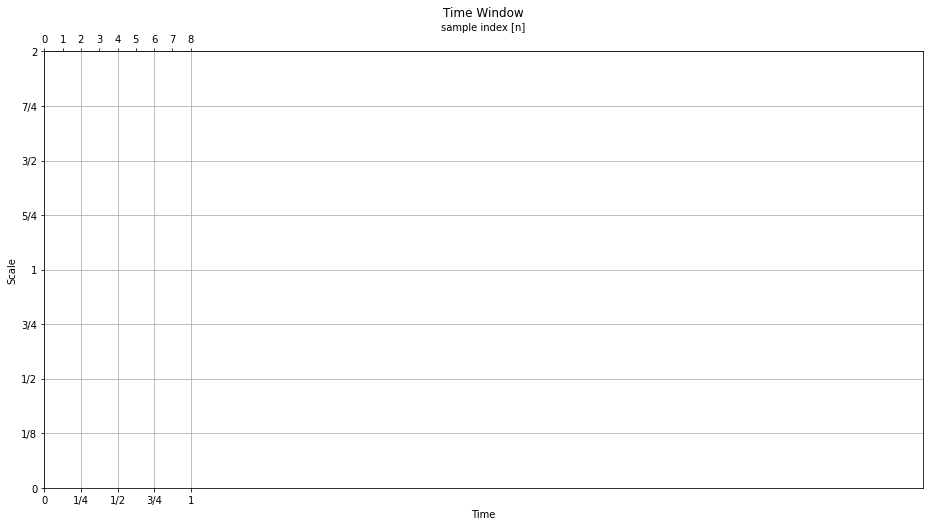

In [553]:
N = 11
S = 9
fig, ax = plt.subplots(constrained_layout = True)
topxax = ax.secondary_xaxis('top')
#rightyax = ax.secondary_yaxis('right')
ax.set_xlabel('Time')
ax.set_ylabel('Scale')
support = np.linspace(0, 1, S)
ax.set_xticks(np.linspace(0, 1, 5))
ax.set_xticklabels(['0', '1/4', '1/2', '3/4', '1'])
ax.set_yticks(np.linspace(0, 2, S))
ax.set_yticklabels(['0', '1/8', '1/2', '3/4', '1', '5/4', '3/2', '7/4', '2'])
ax.grid(True)
ax.set_xlim(0, 6)
ax.set_ylim(0, 2)
topxax.set_xticks(support)
topxax.set_xlabel('sample index [n]')
topxax.set_xticklabels([str(int(pint)) for pint in np.arange(S, dtype=int)])
ax.set_title('Time Window')


# Gaussian Windows

0.9999992187848458

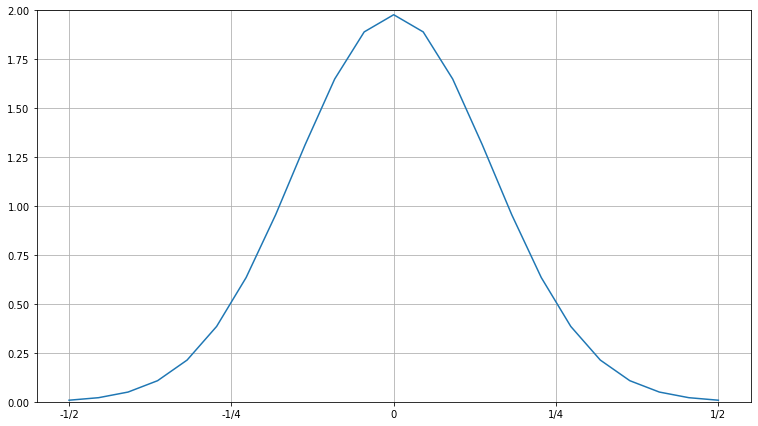

In [554]:
M = 23
s= (M - 1) // 2
t = np.linspace(-s, s, num=M) / (M - 1)
w = np.sqrt(M)/(s*np.pi)**(1/4)*np.exp(-(s*t)**2 * 2 / s)
plt.plot(t, w)
winsupport = np.linspace(-1/2, 1/2, 3)
plt.xticks(np.linspace(-1/2, 1/2, 5), labels=['-1/2', '-1/4', '0', '1/4', '1/2'])
plt.grid(True)
#plt.xlim(-1/2, 1/2)
plt.ylim(0, 2)

1 / M * np.sum(w**2) 

1.0

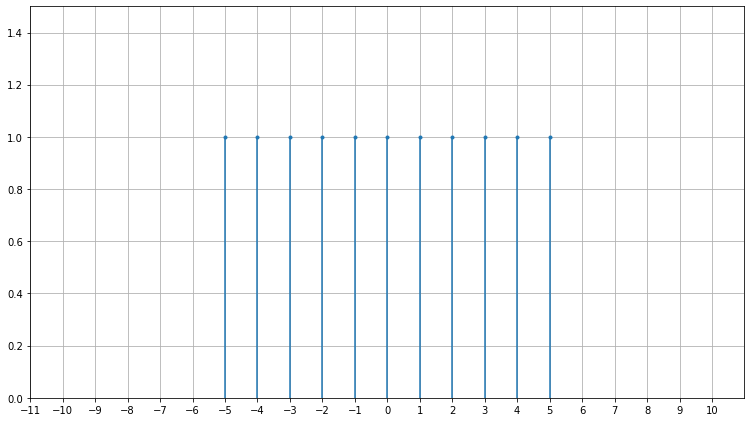

In [669]:
M = 11
s= (M - 1) // 2
t = np.linspace(-s, s, num=M)
w = np.ones(M)
plt.vlines(t, 0, w)
plt.plot(t, w,  '.')
plt.xticks(np.arange(-M, M))
#plt.xticks(np.linspace(-1/2, 1/2, 5), labels=['-1/2', '-1/4', '0', '1/4', '1/2'])
plt.grid(True)
plt.xlim(-M, M)
plt.ylim(0, 1.5)

1 / M * np.sum(w**2) 

11
mag power=1.0


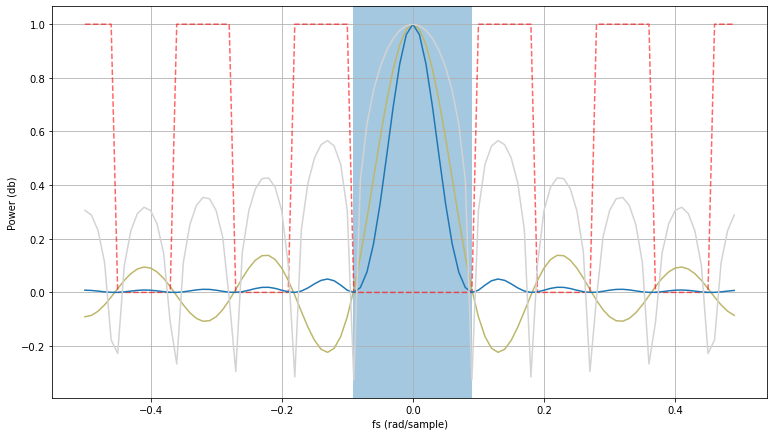

In [1034]:
#M = int(2**8+1)
M =  11
Nw = 100
M2 = int((M-1) // 2)
#k = np.linspace(-M2, M2, num=M).astype(int)
w  =  np.linspace(-np.pi, np.pi, num=Nw, endpoint=False)
nw  =  w / 2 / np.pi
#k = np.arange(-M2, M2).astype(int)
print(M)
#spectrum = np.sinc(np.pi * k / M2)
specnorm = util.asinc(M, w)
#spectrum = np.sinc(4 * np.pi * k / M).astype(complex)
#spectrum = np.sqrt(m) * np.sinc(16 * k)
spectrum = np.nan_to_num(specnorm, copy=True, nan=1) * M / np.sqrt(M)
mag = np.abs(spectrum)
power = mag**2
plt.grid(True)
#plt.figure()
db = 10*np.log10(power)
db -= np.max(db)
plt.plot(nw, specnorm, mcolors.CSS4_COLORS["darkkhaki"])
plt.plot(nw, np.angle(spectrum) / np.pi, '--r', alpha=0.6)
plt.plot(nw, power / M)
plt.plot(nw, db / 30 + 1, mcolors.CSS4_COLORS["lightgray"])
#plt.plot(w, mag, mcolors.CSS4_COLORS["dimgrey"])
plt.ylabel('Power (db)')
plt.xlabel('fs (rad/sample)')
#plt.ylim(-0.5, 1.2)
#plt.xlim(-1, 1)
#plt.grid(True)

plt.axvspan(-1/M, 1/M, alpha=0.4)
#plt.figure()
#plt.ylabel('Phase')
#plt.xlabel('fs (rad/sample)')
#plt.grid(True)
#plt.plot(w, np.angle(spectrum))
#plt.xlim(-1, 1)
#plt.ylim(0, 1.5*np.pi)
print(f'mag power={1 / Nw * np.sum(power)}')



Text(0.5, 1.0, 'Phase Window')

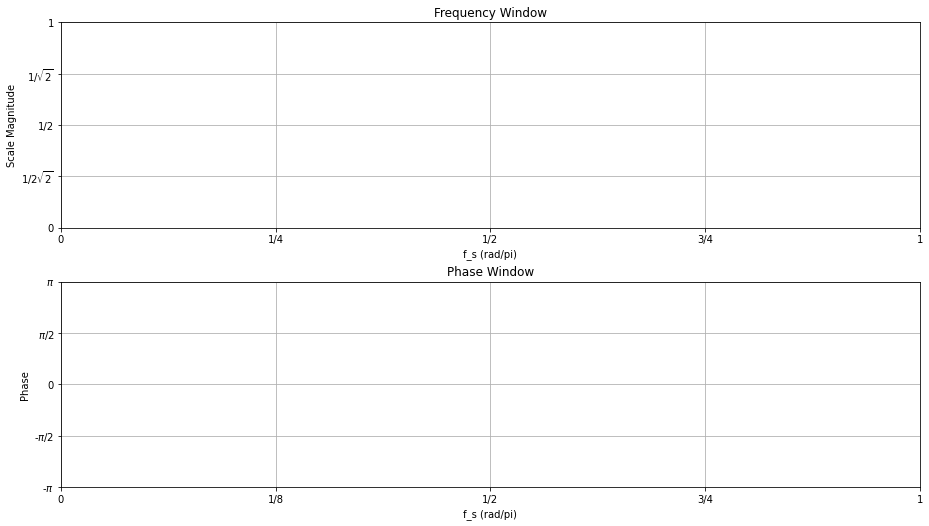

In [940]:
fig, ax = plt.subplots(2, constrained_layout = True)
axph = ax[1]
axmag = ax[0]
axmag.set_xlabel('f_s (rad/pi)')
axmag.set_ylabel('Scale Magnitude')
axmag.set_xticks(np.linspace(0, 1, 5))
axmag.set_xticklabels(['0', '1/4', '1/2', '3/4', '1'])
axmag.set_yticks(np.linspace(0, 2, 5))
axmag.set_yticklabels(['0', r'$1 / 2\sqrt{2}$', r'1/2', r'$ 1  / \sqrt{2}$', '1'])
axmag.grid(True)
axmag.set_xlim(0, 1)
axmag.set_ylim(0, 2)
#topxax.set_xticks(support)
#topxax.set_xlabel('sample index [k]')
#topxax.set_xticklabels([str(int(pint)) for pint in np.arange(S, dtype=int)])
#ax.plot(support, np.linspace(0, 2, S))
axmag.set_title('Frequency Window')

axph.set_xlabel('f_s (rad/pi)')
axph.set_ylabel('Phase')
axph.set_xticks(np.linspace(0, 1, 5))
axph.set_xticklabels(['0', '1/8', '1/2', '3/4', '1'])
axph.set_yticks(np.linspace(-1/2, 1/2, 5))
axph.set_yticklabels([r'-$\pi$', r'-$\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
axph.grid(True)
axph.set_xlim(0, 1)
axph.set_ylim(-1/2, 1/2)
axph.set_title('Phase Window')


In [941]:
F =  np.array([700, 1220, 2600])
B = np.array([130, 70, 160])

fs = 8192
R =  np.exp(-np.pi * B /  fs)
theta = np.array(2*np.pi*F/fs, dtype=complex)
poles = R * np.exp(1j * theta)

In [942]:
import scipy.signal as sg

filt = sg.zpk2sos([0], np.concatenate((poles, np.conj(poles))), 1)
f0 = 200
w0T = 2*np.pi*f0/fs


In [943]:
nharm = int(np.floor((fs/2)/f0))
nsamps = fs
sig = np.zeros(nsamps)

n = np.arange(nsamps)
for h in np.arange(nharm):
	sig += np.cos(h * w0T * n)

sig = sig/np.max(sig)
outsig = sg.sosfilt(filt, sig)

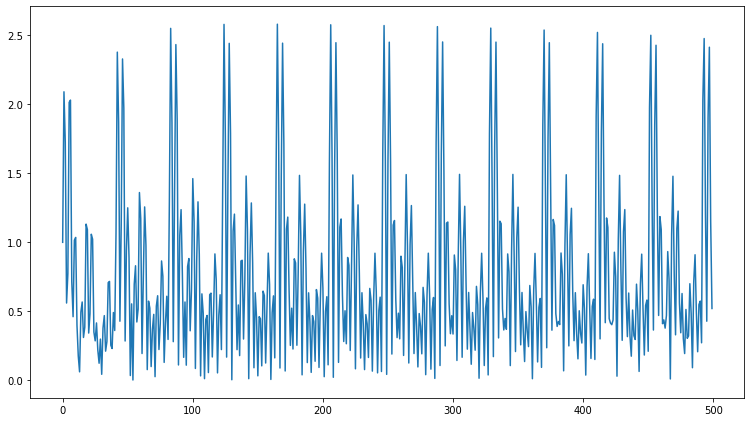

In [944]:
plt.plot(np.abs(outsig[:500]))

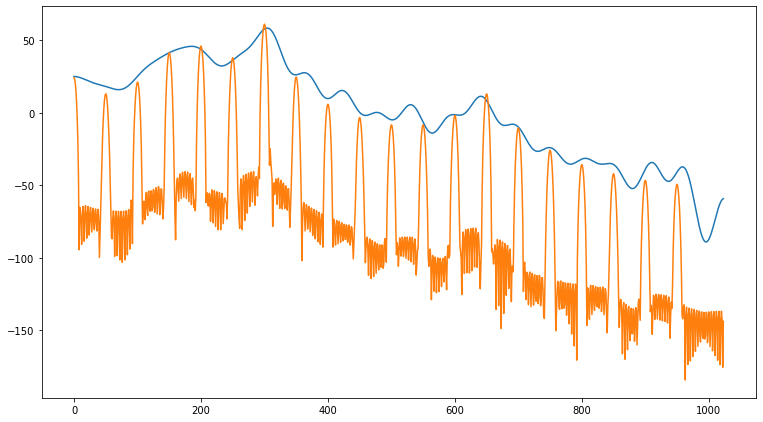

In [945]:
Nframe = 512
_, w= windows.hamming(Nframe)
winsig =  w * outsig[:Nframe]
Nfft = 4 * Nframe
sspec = 2 * np.pi * np.fft.fft(winsig, Nfft, norm='ortho')
dbsspec =  20*np.log(np.abs(sspec))
rcept =  np.fft.ifft(dbsspec, norm='ortho')
rcept = np.real(rcept)

nspec = int(Nfft / 2)

period = int(round(fs/f0))
nw = 2 * period - 5
wn =  np.ones(nw)
wzp = np.concatenate((wn[nw//2:nw], np.zeros(Nfft-nw), wn[:nw//2]))
wrcept = wzp * rcept
rcepenv =  np.fft.fft(wrcept, norm='ortho')
rcepenvp = np.real(rcepenv[:nspec])
rcepenvp = rcepenvp - np.mean(rcepenvp)

plt.plot(rcepenvp)
plt.plot(dbsspec[:dbsspec.size//2])